# Install Library  

In [9]:
%pip install plotly-express

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

# Read Dataset

In [11]:
df = pd.read_csv('dataset_final/final_dataset.csv')
df.head()

,GameID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,...,Patch,EventID,EventName,EventStage,Team1ID,Team2ID,Team1,Team2,Team1_MapScore,Team2_MapScore
0,60894,Reduxx,Boos,jett,313.0,24.0,10.0,3.0,14.0,195.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
1,60894,ChurmZ,Boos,chamber,227.0,16.0,10.0,7.0,6.0,161.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
2,60894,diaamond,Boos,sova,226.0,17.0,9.0,8.0,8.0,148.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
3,60894,Boltzy,Boos,viper,218.0,17.0,12.0,2.0,5.0,141.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
4,60894,Virtyy,Boos,skye,80.0,5.0,13.0,3.0,-8.0,55.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1


In [12]:
tes = df.groupby(['Agent', 'Map'])[['Kills', 'Deaths']].mean()
tes

Kills     Deaths
Agent Map                           
astra Ascent    13.994878  14.214001
      Bind      13.924673  14.037663
      Breeze    14.089286  13.946429
      Fracture  14.571429  14.357143
      Haven     13.813842  13.809069
...                   ...        ...
yoru  Breeze    14.952381  14.333333
      Fracture   9.666667  16.666667
      Haven     13.266667  15.666667
      Icebox    14.222222  15.666667
      Split     15.500000  14.200000

[119 rows x 2 columns]

In [13]:
# merge_nonnull['Agent'].unique()
tes.shape[0]

119

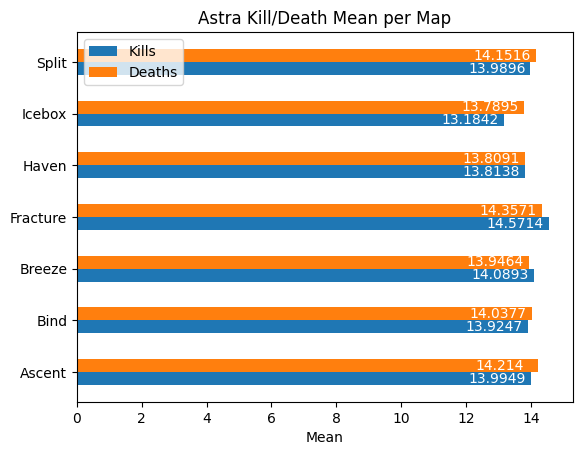

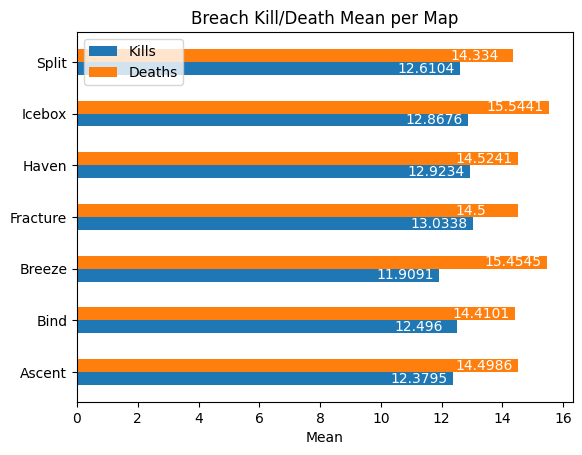

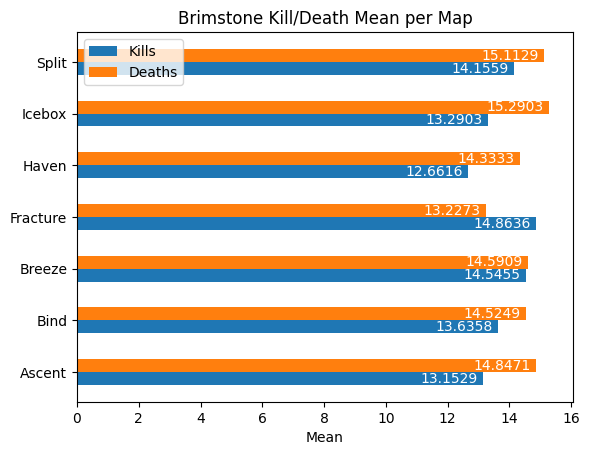

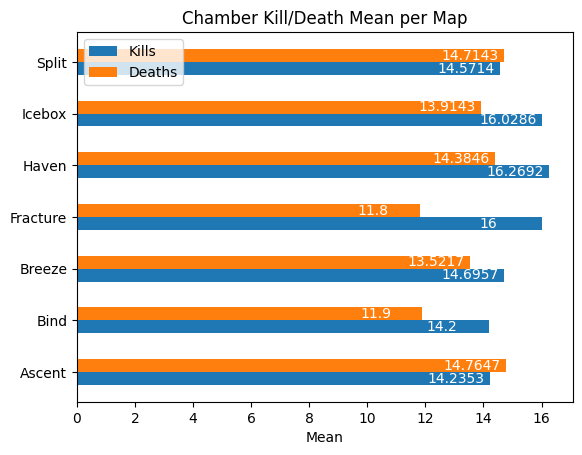

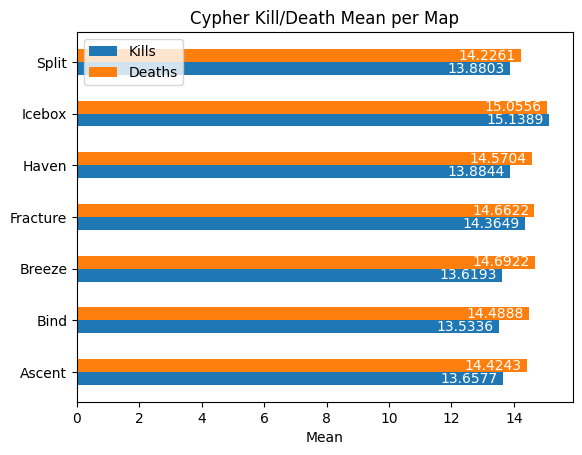

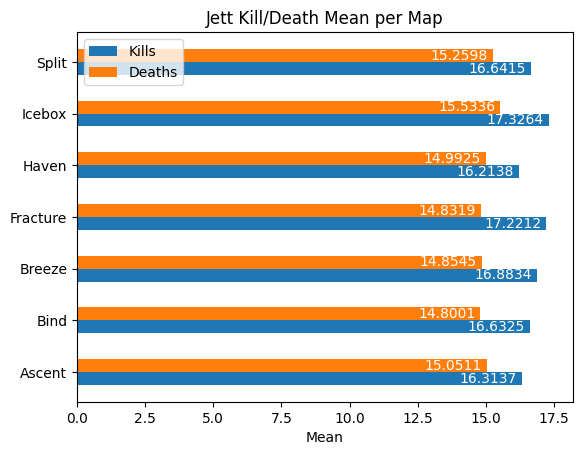

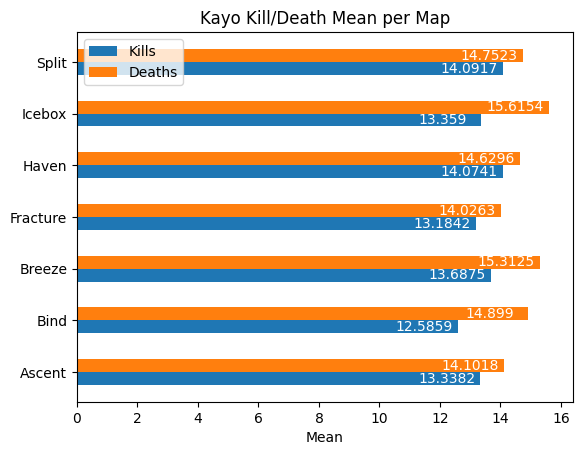

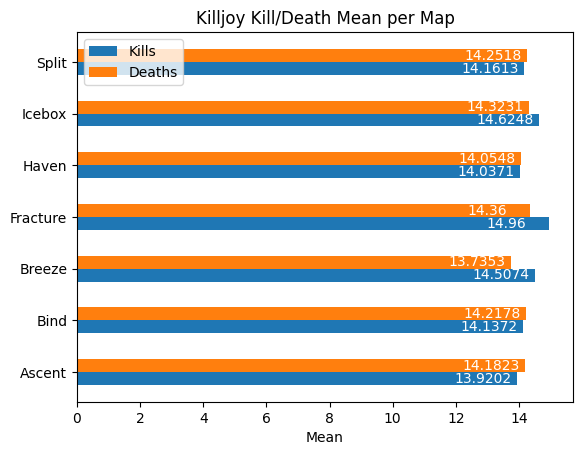

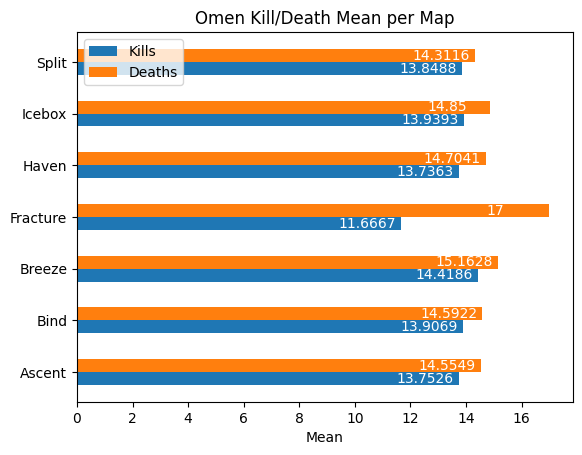

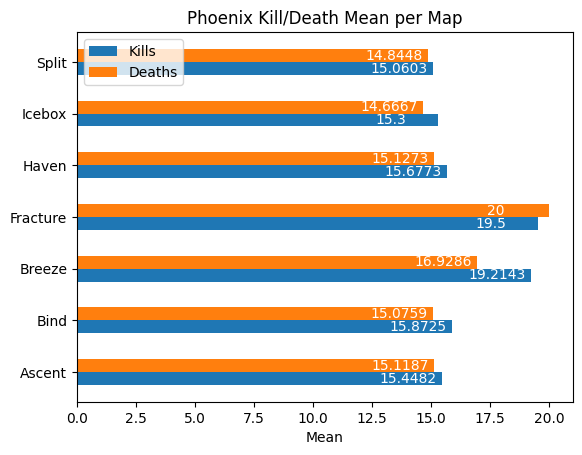

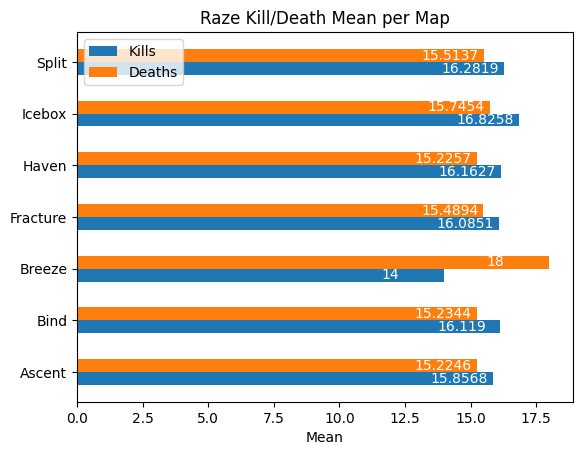

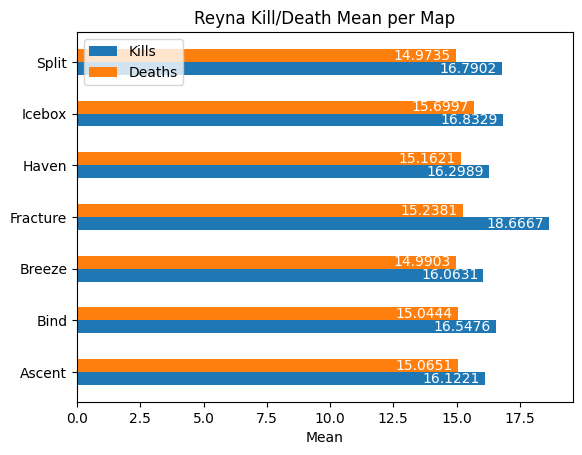

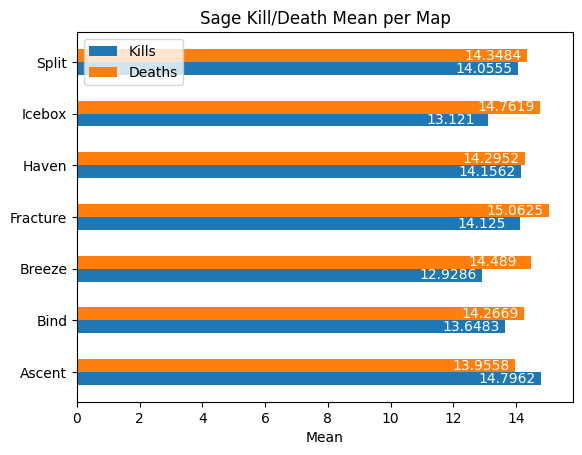

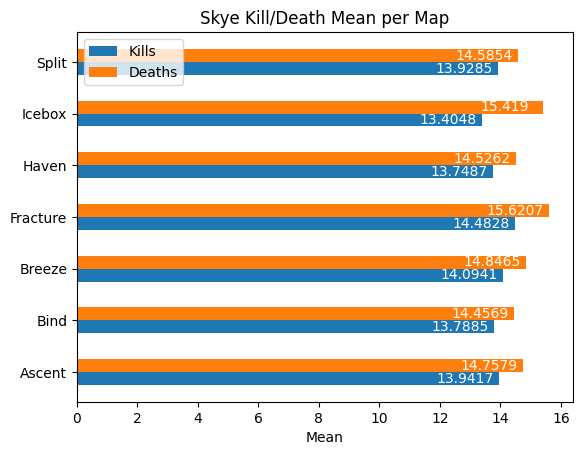

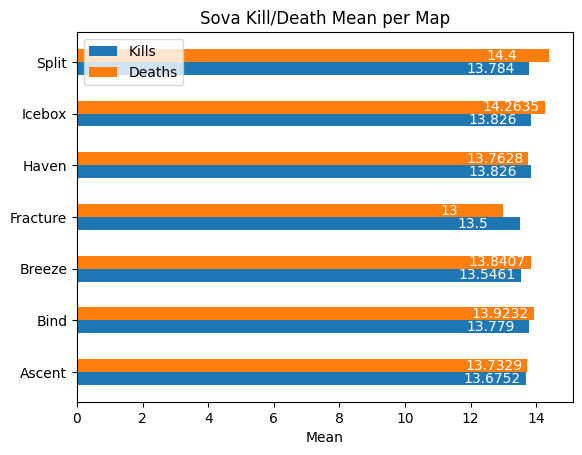

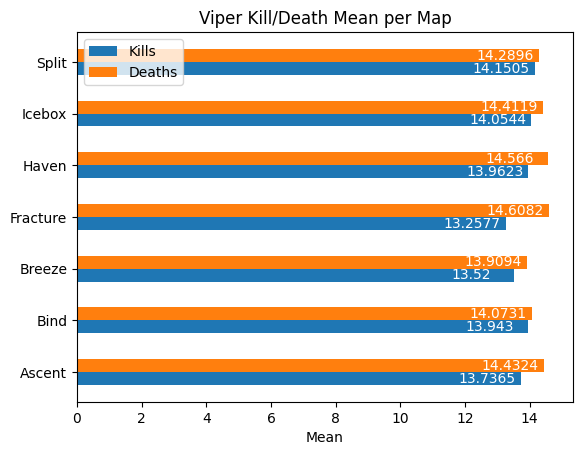

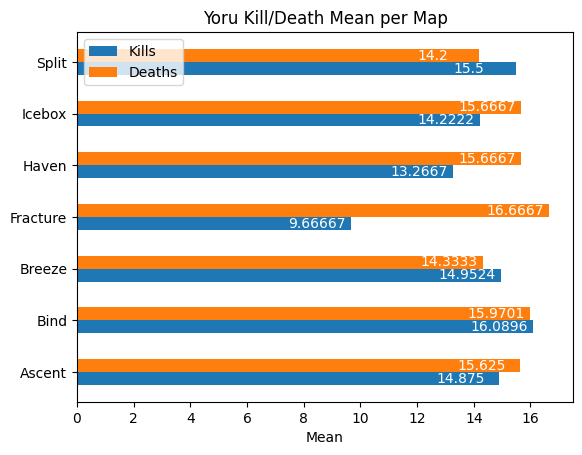

In [22]:
for i in range(0, tes.shape[0], 7):
    plot_Bar = tes.iloc[i:i+7]

    x = np.arange(len(plot_Bar.index))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots()

    for attribute, measurement in plot_Bar.items():
        offset = width * multiplier
        rects = ax.barh(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=-45, color='white')
        multiplier += 1

    y_label = []
    for agent, map in plot_Bar.index:
        y_label.append(map)
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Mean')
    ax.set_title(f'{agent.capitalize()} Kill/Death Mean per Map')
    ax.set_yticks(x + 0.125, y_label)
    ax.legend(loc='upper left')

    plt.show()